# Lab | Model Evaluation and Improving contd


In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [199]:
from sklearn.compose import ColumnTransformer

In [200]:
df_marketing = pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")

In [201]:
df_marketing

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [202]:
df_numerical = df_marketing.select_dtypes(include=np.number)
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


<AxesSubplot:>

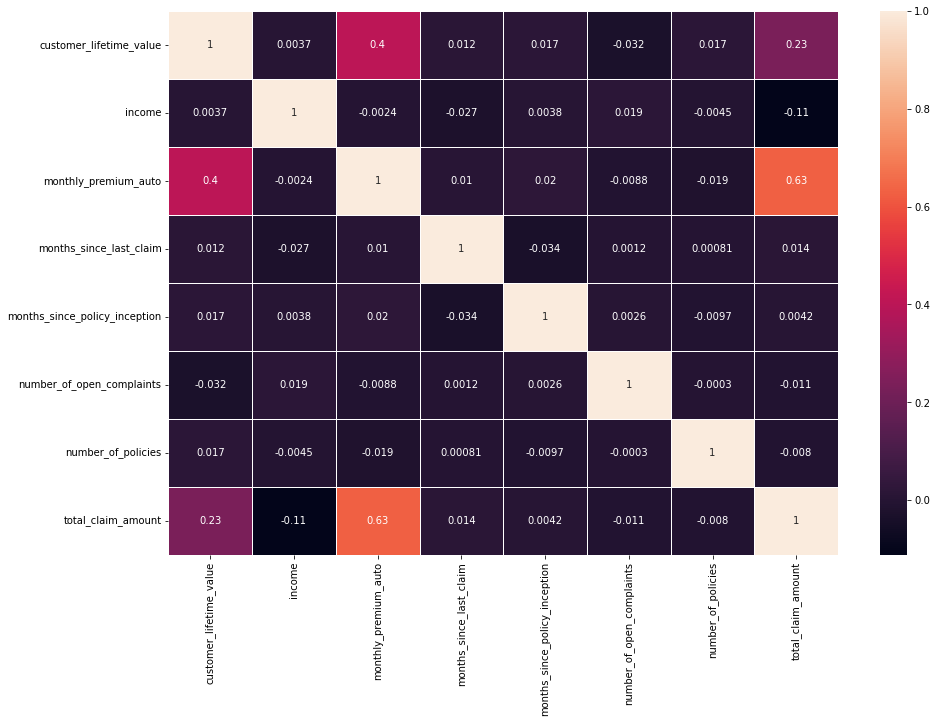

In [203]:
#Plot the Correlation Heatmap.

fig=plt.figure(figsize=(15,10))
sns.heatmap(df_numerical.corr(),annot=True, linewidth= 1)

In [204]:
df_categorical = df_marketing.select_dtypes(exclude=np.number)
df_categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [205]:
len(df_categorical.isnull())

10689

In [206]:
df_categorical_clean = df_categorical.dropna() 
df_categorical_clean

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [247]:
list(df_categorical_clean.columns)

['region',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'month',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [248]:
list(df_numerical.columns)

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [207]:
# Encoding Categrocial code

In [208]:
df_categorical_encode = pd.get_dummies(df_categorical_clean, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=True, dtype=None)


In [209]:
df_categorical_encode

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [210]:
# Merging Numerical + Categorical encode Data

In [211]:
d = df_numerical.merge(df_categorical_encode, left_index=True, right_index=True) 
d

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,1,0,0,0,0,0,1,0,1,0


In [212]:
d.drop_duplicates()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,1,0,0,0,0,0,1,0,1,0


In [213]:
# Slpit X,y

In [214]:
X=d.drop('total_claim_amount', axis=1)
y=d.total_claim_amount

In [215]:
X=X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,92260,64,3,26,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,33,31,0,7,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,0,0,1,...,1,0,0,0,0,0,1,0,1,0


In [216]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [217]:
# Scaling X Train Model

In [218]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
6608,7271,20545,70,23,86,0,2,0,1,0,...,0,0,0,0,0,0,0,1,1,0
5697,5079,70474,68,6,95,0,5,0,1,0,...,0,0,0,0,0,0,0,1,0,1
10524,4428,58577,110,6,62,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
397,22332,49078,97,10,3,0,2,0,0,1,...,1,0,0,0,0,0,0,1,0,1
6324,2430,26182,70,29,30,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,3086,73938,76,34,48,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
7763,5658,78834,72,14,20,2,8,0,1,0,...,0,1,0,0,0,0,0,1,0,1
5218,2434,23033,62,5,9,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1346,23594,76358,66,25,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [219]:
X_train.shape


(7482, 108)

In [220]:
# Scaling Test Model

In [221]:
X_test_scaled=std_scaler.transform(X_test)

In [222]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)


[[-0.11021627 -1.27291744 -0.67143823 ...  1.95153357  0.65744645
  -0.491129  ]
 [-0.42794064  0.74729478 -0.72925469 ...  1.95153357 -1.52103643
   2.03612492]
 [-0.5223013   0.26592193  0.48489091 ... -0.51241752  0.65744645
  -0.491129  ]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ...  1.95153357 -1.52103643
   2.03612492]
 [ 2.25575772  0.98537142 -0.78707115 ... -0.51241752  0.65744645
  -0.491129  ]
 [ 1.18923585  0.68583346 -0.55580532 ... -0.51241752  0.65744645
  -0.491129  ]]
--------
[[-0.40967729  1.58428551 -0.61362178 ...  1.95153357  0.65744645
  -0.491129  ]
 [-0.7597249  -0.93947257 -0.64253    ... -0.51241752  0.65744645
  -0.491129  ]
 [ 0.57248529 -1.23371005 -0.90270406 ...  1.95153357  0.65744645
  -0.491129  ]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ...  1.95153357  0.65744645
  -0.491129  ]
 [-0.42547654 -0.97370317 -0.81597938 ...  1.95153357  0.65744645
  -0.491129  ]
 [-0.49881985 -0.95695203  0.71615674 ...  1.95153357 -1.52103643
  -0.491129  ]]


In [223]:
#Apply Linear Regression
#Modeling using Statsmodels

In [246]:

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     238.9
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:52:11   Log-Likelihood:                -47600.
No. Observations:                7482   AIC:                         9.541e+04
Df Residuals:                    7376   BIC:                         9.615e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        433.0597      1.632    265.300      0.0

In [225]:
#Modeling using Scikit Learn
#Model fitting

In [226]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [227]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
6608,7271,20545,70,23,86,0,2,0,1,0,...,0,0,0,0,0,0,0,1,1,0
5697,5079,70474,68,6,95,0,5,0,1,0,...,0,0,0,0,0,0,0,1,0,1
10524,4428,58577,110,6,62,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
397,22332,49078,97,10,3,0,2,0,0,1,...,1,0,0,0,0,0,0,1,0,1
6324,2430,26182,70,29,30,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,3086,73938,76,34,48,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
7763,5658,78834,72,14,20,2,8,0,1,0,...,0,1,0,0,0,0,0,1,0,1
5218,2434,23033,62,5,9,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1346,23594,76358,66,25,3,0,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [228]:
y_train

6608     336
5697     326
10524    303
397      484
6324     341
        ... 
9785      53
7763     345
5218     500
1346      86
3582     680
Name: total_claim_amount, Length: 7482, dtype: int64

In [229]:
model.coef_

array([ 1.00486243e-01, -5.53838937e+00,  1.78677911e+02,  5.02427191e+00,
        5.19412774e-01,  1.62825823e+00, -8.34970049e-01,  2.33828809e+00,
        3.17557391e-01,  2.34351834e+00, -9.10377952e+00, -5.37265235e+00,
       -3.63807897e+00, -3.67111948e+00, -3.84668204e+00,  2.25842760e+00,
       -3.45312683e+00, -1.18999148e+00, -1.46115478e+00, -4.22044758e-01,
        3.20111318e+00, -1.11353576e+00, -3.71467990e-01, -1.69892297e+00,
       -1.31330294e+00, -1.55770716e+00, -2.06168957e+00,  1.01446454e+00,
        1.09255552e+00, -1.70273121e+00,  4.57313305e-01, -2.48626995e+00,
       -3.76346521e+00, -7.68194009e-01,  1.87914173e+00,  5.72010924e-01,
       -5.28152088e-01,  2.47893630e+00,  1.25605825e+00, -1.74491903e+00,
       -3.63694590e+00, -7.30588163e-01,  3.87665171e-01, -4.71284308e-01,
       -2.49058227e+00, -9.31538008e-01, -3.33001013e+00, -2.34505960e+13,
       -2.38858083e+13, -2.43970451e+13, -2.34505960e+13, -2.12284325e+13,
       -2.48143985e+13, -

In [230]:
model.intercept_


433.04836934531085

In [231]:
#Making prediction


In [232]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [233]:
y_pred

array([438.26793848, 393.42897434, 140.37571498, ..., 588.42488658,
       -32.35210255, 480.7776699 ])

In [234]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [235]:
#Evaluating Model Performance

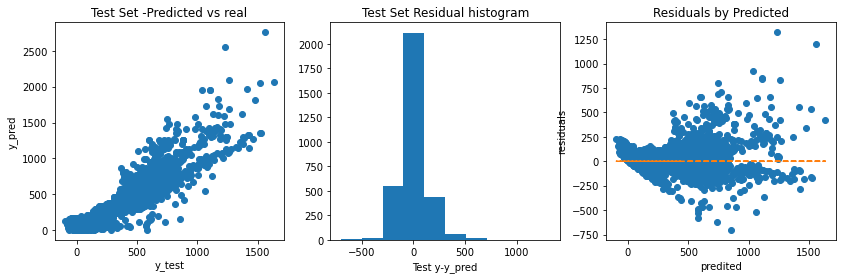

In [236]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

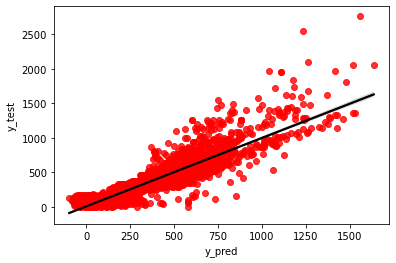

In [237]:
#more fancy using seaborn

sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [238]:
#Error metrics

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

19167.721921749828
95.6323976323563


In [239]:
##prediction on the train set
mse(y_train,y_pred_train)

19653.65133808031

In [240]:
from sklearn.metrics import r2_score

R2=r2_score(y_test,y_pred)
R2

0.7702125959310828

In [241]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [242]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7622019311023407

In [243]:
#getting the number of parameters
X_test.shape[1]

108

In [244]:
#Feature Importance

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
91,policy_personal l3,8.972583e+13
75,month_jan,8.923283e+13
85,policy_type_personal auto,8.077784e+13
90,policy_personal l2,7.774857e+13
89,policy_personal l1,6.345686e+13
...,...,...
107,vehicle_size_small,2.368496e-01
88,policy_corporate l3,2.245326e-01
83,marital_status_married,1.917491e-01
0,customer_lifetime_value,1.004862e-01


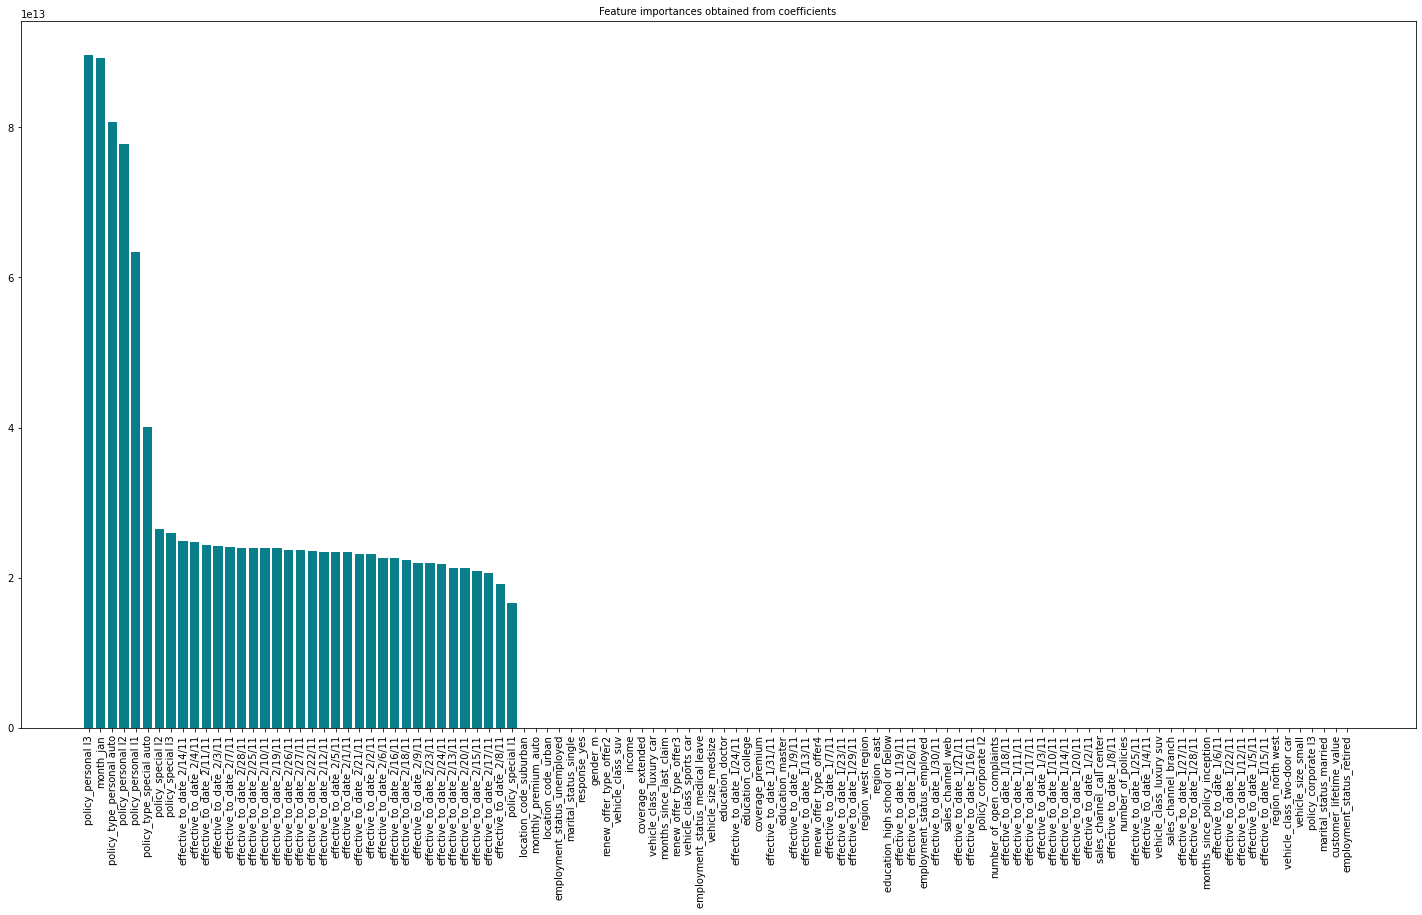

In [245]:
fig = plt.figure(figsize = (25,13))
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()